# Diamond Price Prediction
### Comparing KNN from Scratch and KNN using ML Model.
#### Data Description:

1. Title : Diamonds Dataset

2. the 7th column "price" is the values to be predicted.

3. Data Type : Mixed ( Numerical + Categorical)

4. Dataset has nearly 54000 instances.

5. It has 10 features.
6. Features

   price : price in US dollars ($326--$18,823)

   carat : weight of the diamond (0.2--5.01)

   cut : quality of the cut (Fair, Good, Very Good,    Premium, Ideal)

   color : diamond colour, from J (worst) to D        (best)

   clarity : a measurement of how clear the diamond    is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1,    IF (best))

   x : length in mm (0--10.74)

   y : width in mm (0--58.9)

   z : depth in mm (0--31.8)

   depth : total depth percentage = z / mean(x, y)    = 2 * z / (x + y) (43--79)

    table : width of top of diamond relative to         widest point (43--95)

7. Caution : Handle Categorical data before building a model.

## Load Data

In [86]:
# importing important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [87]:
# Loading dataset
df = pd.read_csv('~\Downloads\diamonds.csv')

In [88]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [89]:
df.shape

(53940, 10)

In [90]:
df.rename(columns={'x':'length', 'y':'width', 'depth':'depth%'}, inplace = True)
df.head()

,carat,cut,color,clarity,depth%,table,price,length,width,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [91]:
df.rename(columns={'z': 'depth',},inplace=True)
df.head()

,carat,cut,color,clarity,depth%,table,price,length,width,depth
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [92]:
# creating Target column separately to concat it at the end of the columns
df_target = df[['price']]
df_target.head()

,price
0,326
1,326
2,327
3,334
4,335


In [93]:
# Dropping the Target column
df = df.drop('price', axis = 1)
df.head()

,carat,cut,color,clarity,depth%,table,length,width,depth
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75


In [94]:
# concat Target column at the end of the columns
df = pd.concat([df, df_target], axis = 1)
df.head()

,carat,cut,color,clarity,depth%,table,length,width,depth,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335


In [95]:
df.shape

(53940, 10)

# EDA

In [96]:
# Description of data
df.describe()

,carat,depth%,table,length,width,depth,price
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,5.731157,5.734526,3.538734,3932.799722
std,0.474011,1.432621,2.234491,1.121761,1.142135,0.705699,3989.439738
min,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,950.000000
50%,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000,2401.000000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000,5324.250000
max,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000,18823.000000


In [97]:
# There are missing values as 0 in columns
df[['length', 'width', 'depth']][(df['length']==0) | (df['width']==0)  |  (df['depth']==0)]

,length,width,depth
2207,6.55,6.48,0.0
2314,6.66,6.60,0.0
4791,6.50,6.47,0.0
5471,6.50,6.47,0.0
10167,7.15,7.04,0.0
11182,0.00,6.62,0.0
11963,0.00,0.00,0.0
13601,6.88,6.83,0.0
15951,0.00,0.00,0.0
24394,8.49,8.45,0.0


In [98]:
# replacing 0 with null values(np.NaN)
df[['length','width','depth']] = df[['length','width','depth']].replace(0, np.NaN)

In [99]:
# checking null values
df.isnull().sum()

carat       0
cut         0
color       0
clarity     0
depth%      0
table       0
length      8
width       7
depth      20
price       0
dtype: int64

In [100]:
# Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth%   53940 non-null  float64
 5   table    53940 non-null  float64
 6   length   53932 non-null  float64
 7   width    53933 non-null  float64
 8   depth    53920 non-null  float64
 9   price    53940 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [101]:
df.shape

(53940, 10)

observations: there are no null values in our datadrame

### Univariate Analysis on Continous Variables:


<AxesSubplot:>

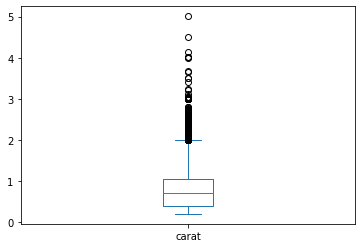

In [102]:
# carat column
df['carat'].plot.box()

<AxesSubplot:>

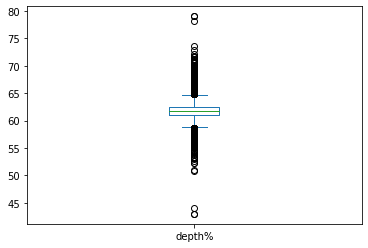

In [103]:
# Depth% column
df['depth%'].plot.box()

<AxesSubplot:>

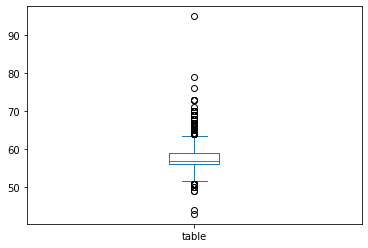

In [104]:
# Table Column
df['table'].plot.box()

<AxesSubplot:>

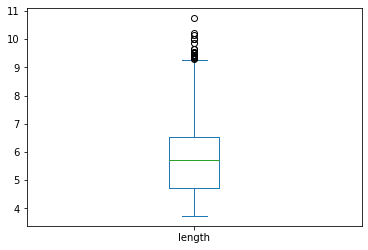

In [105]:
# Length Column
df['length'].plot.box()

<AxesSubplot:>

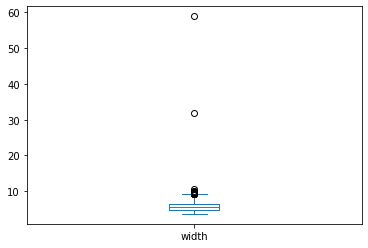

In [106]:
# Width column
df['width'].plot.box()

<AxesSubplot:>

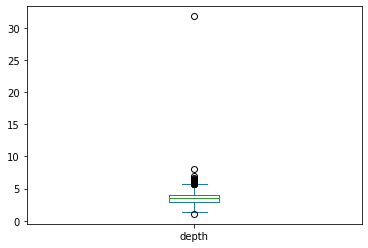

In [107]:
# Depth Column
df['depth'].plot.box()

<AxesSubplot:>

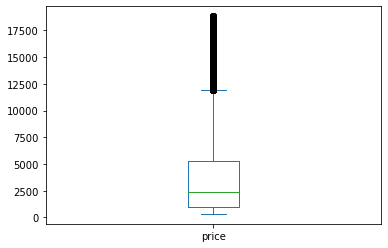

In [108]:
# price column
df['price'].plot.box()

### Univariate Analysis on Categorical Variable:

<AxesSubplot:>

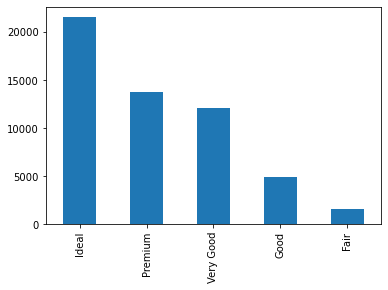

In [109]:
# Barplot for Cut
df['cut'].value_counts().plot.bar()

cut: quality of the cut(fair, Good, Very Good,Premium Ideal)

<AxesSubplot:>

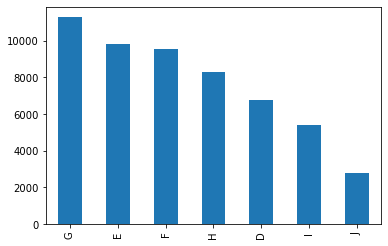

In [110]:
# barplot for color
df['color'].value_counts().plot.bar()

color : diamond colour, from J(worst) to D (best)

<AxesSubplot:>

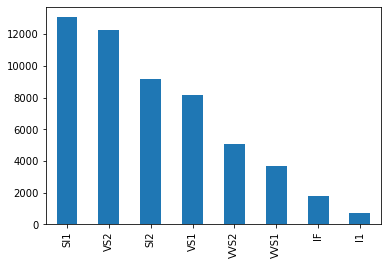

In [111]:
# Barplot for Clarity
df['clarity'].value_counts().plot.bar()

clarity : a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

### Bivariate Analysis on Numerical- Numerical Variables:

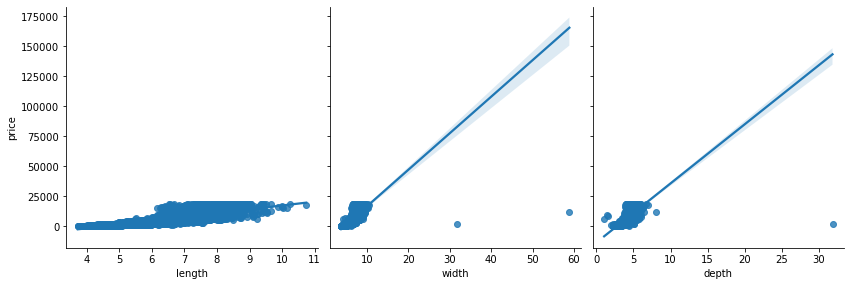

In [112]:
# Pairplot
g= sns.pairplot(df , height=4, aspect =1, x_vars = ['length','width','depth'] , y_vars =  ['price'] , kind = 'reg')

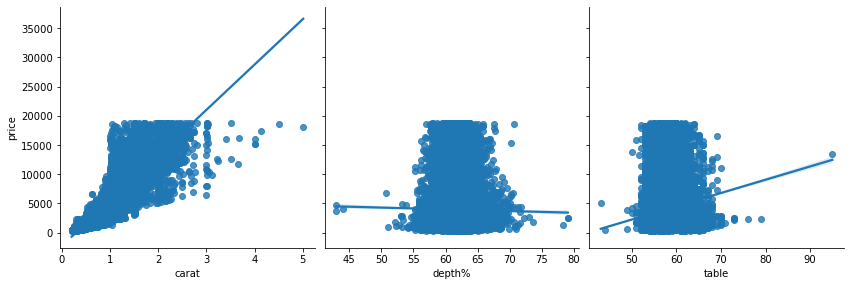

In [113]:
# Pairplot
g= sns.pairplot(df , height=4, aspect =1, x_vars = ['carat','depth%', 'table'] , y_vars =  ['price'] , kind = 'reg')

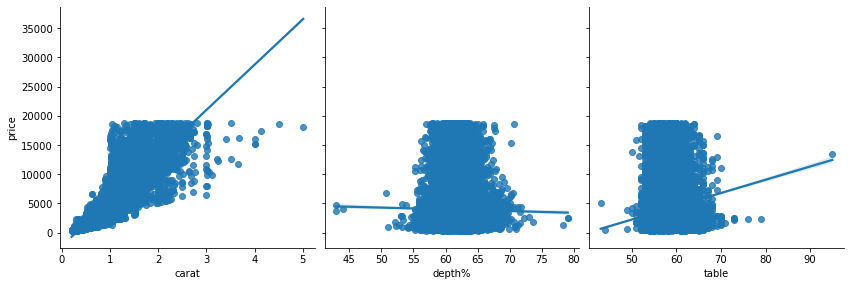

In [114]:
# Pairplot
g= sns.pairplot(df , height=4, aspect =1, x_vars = ['carat','depth%', 'table'] , y_vars =  ['price'] , kind = 'reg')

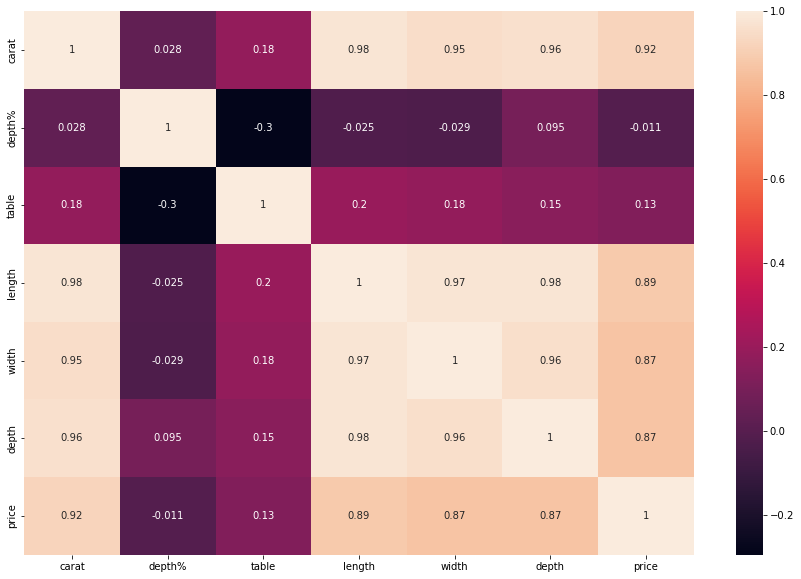

In [115]:
# Heatmap
corr = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot = True)

#### There is a high correlation between carat, length, width, depth and price.

###  Bivariate Analysis on Categorical - Continous Variables:

<AxesSubplot:xlabel='cut'>

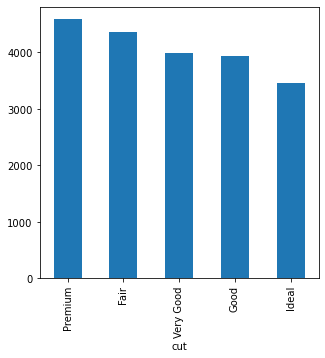

In [116]:
# BARPLOT for Cut and Price
fig, ax = plt.subplots(figsize=(5,5))
df.groupby('cut')['price'].mean().sort_values(ascending = False).plot.bar()

cut : quality of the cut (Fair, Good, Very Good, Premium, Ideal) 

<AxesSubplot:xlabel='color'>

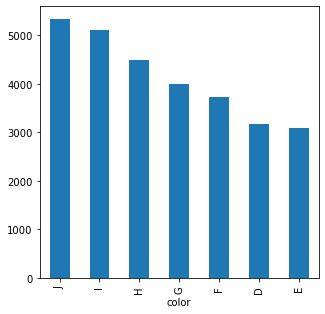

In [117]:
# Barplot for color and price
fig, ax = plt.subplots(figsize=(5,5))
df.groupby('color')['price'].mean().sort_values(ascending = False).plot.bar()

color : diamond colour, from J (worst) to D (best)

<AxesSubplot:xlabel='clarity'>

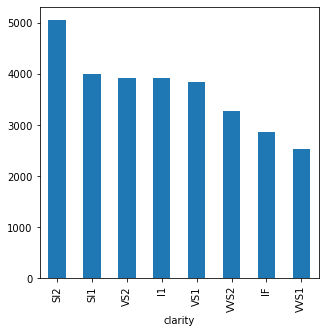

In [118]:
# BARPLOT for Clarity and Price
fig, ax = plt.subplots(figsize=(5,5))
df.groupby('clarity')['price'].mean().sort_values(ascending = False).plot.bar()

clarity : a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))



### Splitting the Target and Independent Columns

In [119]:
X = df.drop('price', axis = 1)
y = df[['price']]

In [120]:
X.head()

,carat,cut,color,clarity,depth%,table,length,width,depth
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75


In [121]:
y.head()

,price
0,326
1,326
2,327
3,334
4,335


#### Splitting Data into Train and Test

In [122]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4)
print('Train Set: ', X_train.shape, y_train.shape)
print('Test Set: ', X_test.shape, y_test.shape)

Train Set:  (40455, 9) (40455, 1)
Test Set:  (13485, 9) (13485, 1)


#### Label Encoding

In [123]:
# Importing LabelEncoder Module
from sklearn.preprocessing import LabelEncoder

In [124]:
X_train.head()

,carat,cut,color,clarity,depth%,table,length,width,depth
29703,0.40,Ideal,E,SI1,62.5,57.0,4.70,4.74,2.95
33251,0.45,Ideal,I,VS1,62.1,55.0,4.90,4.92,3.05
39576,0.42,Ideal,I,VS2,62.1,56.0,4.78,4.85,2.99
50065,0.61,Ideal,D,VS2,62.0,56.0,5.43,5.48,3.38
25803,2.33,Very Good,J,VS2,61.8,59.0,8.41,8.56,5.24


In [125]:
X_test.head()

,carat,cut,color,clarity,depth%,table,length,width,depth
48479,0.56,Ideal,G,VVS2,61.2,55.0,5.35,5.37,3.28
30207,0.34,Ideal,E,SI1,60.4,57.0,4.53,4.55,2.74
6934,0.80,Ideal,F,VVS2,61.6,57.0,5.97,5.94,3.67
52520,0.70,Ideal,F,SI1,61.8,56.0,5.68,5.75,3.53
8034,0.88,Ideal,H,VVS1,62.0,59.0,6.12,6.13,3.80


In [126]:
y_train.head()

,price
29703,707
33251,825
39576,1081
50065,2202
25803,14801


In [127]:
y_train.shape

(40455, 1)

In [183]:
y_test

,price
48479,1979
30207,723
6934,4140
52520,2528
8034,4334
...,...
1902,3079
32818,805
16353,608
22770,10796


In [186]:
y_test.drop([16353,22770, 48116], inplace = True)

In [128]:
X_train.isnull().sum()

carat       0
cut         0
color       0
clarity     0
depth%      0
table       0
length      6
width       5
depth      17
dtype: int64

In [129]:
# label encoding the categorical columns
le= LabelEncoder()
X_train['cut']=le.fit_transform(X_train['cut'])
X_train['color']=le.fit_transform(X_train['color'])
X_train['clarity']=le.fit_transform(X_train['clarity'])

In [130]:
# label encoding the categorical columns
le= LabelEncoder()
X_test['cut']=le.fit_transform(X_test['cut'])
X_test['color']=le.fit_transform(X_test['color'])
X_test['clarity']=le.fit_transform(X_test['clarity'])

### Standardization


In [164]:
from sklearn import preprocessing
X_train_norm = preprocessing.StandardScaler().fit(X_train).transform(X_train)
X_test_norm = preprocessing.StandardScaler().fit(X_test).transform(X_test)

In [165]:
X_train_norm[0:1]

array([[-0.83676221, -0.53786611, -0.93795543, -1.06386133,  0.52625167,
        -0.20414309, -0.91916058, -0.88622861, -0.84973706]])

In [166]:
X_test_norm[0:1]

array([[-0.50698867, -0.53891264,  0.23538155,  1.85076772, -0.38963938,
        -1.10027119, -0.34521786, -0.30947437, -0.361659  ]])

In [167]:
X_train_norm.shape

(40455, 9)

In [160]:
y_train.shape

(40455, 1)

### KNN Scratch

In [136]:
distance=np.zeros(y_test.shape)
y_test_pred=np.zeros(y_test.shape)
k=3
for i in range(len(X_test_norm)):
    distance=np.sqrt(((X_test_norm[i]-X_train_norm)**2).sum(axis=1))
    sort_value=(np.argsort(distance))
    sort_value=sort_value[:k]
    y_test_pred[i]=y_train.iloc[sort_value].mean()
print(y_test_pred)

[[ 2130.66666667]
 [  679.33333333]
 [ 3905.        ]
 ...
 [  575.        ]
 [10786.        ]
 [ 2131.        ]]


In [137]:
y_test_pred = pd.DataFrame(y_test_pred)

In [138]:
y_test_pred.head()

,0
0,2130.666667
1,679.333333
2,3905.000000
3,2555.333333
4,3665.000000


In [139]:
type(y_test_pred)


pandas.core.frame.DataFrame

In [140]:
y_test_pred.shape


(13485, 1)

In [141]:
y_test.shape

(13485, 1)

In [142]:
#Comparision dataframe
comp_df = pd.DataFrame(list(zip(y_test['price'], y_test_pred[0])),
               columns =['Y_test', 'Y_test_pred'])
comp_df.head()

,Y_test,Y_test_pred
0,1979,2130.666667
1,723,679.333333
2,4140,3905.000000
3,2528,2555.333333
4,4334,3665.000000


### Evaluation of Scratch KNN

In [143]:
from sklearn import metrics
knn_scratch_acu=metrics.r2_score(y_test,y_test_pred)

In [144]:
X_train.isnull().sum()

carat       0
cut         0
color       0
clarity     0
depth%      0
table       0
length      6
width       5
depth      17
dtype: int64

In [149]:
X_train= X_train.fillna(method="ffill")
X_train.shape

(40455, 9)

In [150]:
X_train.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth%     0
table      0
length     0
width      0
depth      0
dtype: int64

In [154]:
X_train = X_train[np.isfinite(X_train).all(1)]
X_train

,carat,cut,color,clarity,depth%,table,length,width,depth
29703,0.40,2,1,2,62.5,57.0,4.70,4.74,2.95
33251,0.45,2,5,4,62.1,55.0,4.90,4.92,3.05
39576,0.42,2,5,5,62.1,56.0,4.78,4.85,2.99
50065,0.61,2,0,5,62.0,56.0,5.43,5.48,3.38
25803,2.33,4,6,5,61.8,59.0,8.41,8.56,5.24
...,...,...,...,...,...,...,...,...,...
11863,1.08,2,2,2,62.9,57.0,6.54,6.53,4.11
49861,0.57,3,4,6,61.6,58.0,5.39,5.35,3.31
27063,2.01,3,1,3,62.0,61.0,8.10,8.04,5.00
8366,0.90,4,3,5,58.8,61.0,6.28,6.30,3.70


In [163]:
X_test = X_test[np.isfinite(X_test).all(1)]
X_test

,carat,cut,color,clarity,depth%,table,length,width,depth
48479,0.56,2,3,7,61.2,55.0,5.35,5.37,3.28
30207,0.34,2,1,2,60.4,57.0,4.53,4.55,2.74
6934,0.80,2,2,7,61.6,57.0,5.97,5.94,3.67
52520,0.70,2,2,2,61.8,56.0,5.68,5.75,3.53
8034,0.88,2,4,6,62.0,59.0,6.12,6.13,3.80
...,...,...,...,...,...,...,...,...,...
1902,0.94,1,5,3,63.8,60.0,6.21,6.14,3.94
32818,0.34,3,0,5,60.4,60.0,4.51,4.56,2.74
16353,0.30,3,4,5,62.7,59.0,4.26,4.22,2.66
22770,1.53,2,5,4,62.8,55.0,7.40,7.35,4.63


### KNN from Scikit learn Library


In [151]:
#Importing KNN regressor class from neighbours module
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors

In [179]:
model = neighbors.KNeighborsRegressor(n_neighbors = 3)
model.fit(X_train_norm, y_train)

KNeighborsRegressor(n_neighbors=3)

In [180]:
X_test= X_test.fillna(method="ffill")
X_test.shape

(13482, 9)

In [187]:
pred=model.predict(X_test_norm) #make prediction on test set
skl_acu=metrics.r2_score(y_test,pred)

In [188]:
print("Accuracy calculated using knn scratch:",knn_scratch_acu)
print("Accuracy calculated using Scikitlearn:",skl_acu)

Accuracy calculated using knn scratch: 0.9578010696273823
Accuracy calculated using Scikitlearn: -0.7632685420409651


# Therefore, We got the same accuracy from both the methods.